## Encoding, Binning & Re-categorise

### Encoding
Machine Learning Tidak dapat menerima tipe Data String & NULL value

===> Kita perlu mengubah string / kategori menjadi Numerik
==> Encoding ==> Proses mengubah data kategorik (string) menjadi Numerik

Encoding terbagi menjadi 2

Label Encoding :
- Mengubah kategori menjadi angka berurutan
- Data yg diubah, adalah data yg bertipe Ordinal (Order Nominal) / Kategori yg berurutan atau memiliki tingkatan
- Data nominal tapi berisi Binary (2 kategori)


One Hot Encoding :
- Membuat Kolom Baru sebanyak jumlah kategori yg akan di encode
- Isi kolom tersebut, value nya mengikuti konsep Biner
- Data yg diubah adalah kategori yg bersifat Nominal (Tidak memiliki tingkatan/urutan)

====================================================================================================

### Binning & Re-Categorise
Feature Engineering yg memanfaatkan encoding 

Binning :
- Mengubah numerik menjadi kategori
- bertujuan agar Model ML lebih mudah membaca Pola dari data
- Jumlah kategori berdasarkan analisa
- contoh pengelompokkan (proses binning) adalah Usia

Re-categorise :
- Membuat kategori baru dari kategori yg sudah ada
- re-categorise dilakukan berdasarkan domain knowledge
- contoh nya : Negara di kategori ulang menjadi Benua

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,FDA_25,3,1.0,0.75,34.384843


In [5]:
df.isna().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,3.000000,1.500000,1.500000,93.704912


In [7]:
df.describe(include='O')

,mfr,type,vitamins
count,77,77,77
unique,7,2,3
top,K,C,FDA_25
freq,23,74,63


In [9]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [10]:
pd.DataFrame(data = dataDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,mfr,object,0,0.0,7,"[Q, N]"
1,type,object,0,0.0,2,"[H, C]"
2,calories,int64,0,0.0,11,"[140, 70]"
3,protein,int64,0,0.0,6,"[1, 2]"
4,fat,int64,0,0.0,5,"[2, 3]"
5,sodium,int64,0,0.0,27,"[135, 70]"
6,fiber,float64,0,0.0,13,"[10.0, 2.0]"
7,carbo,float64,1,1.3,21,"[13.5, nan]"
8,sugars,float64,1,1.3,16,"[6.0, 5.0]"
9,potass,float64,2,2.6,35,"[140.0, 35.0]"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 100% Bran to Wheaties Honey Gold
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mfr       77 non-null     object 
 1   type      77 non-null     object 
 2   calories  77 non-null     int64  
 3   protein   77 non-null     int64  
 4   fat       77 non-null     int64  
 5   sodium    77 non-null     int64  
 6   fiber     77 non-null     float64
 7   carbo     76 non-null     float64
 8   sugars    76 non-null     float64
 9   potass    75 non-null     float64
 10  vitamins  77 non-null     object 
 11  shelf     77 non-null     int64  
 12  weight    77 non-null     float64
 13  cups      77 non-null     float64
 14  rating    77 non-null     float64
dtypes: float64(7), int64(5), object(3)
memory usage: 12.1+ KB


In [12]:
df.dtypes

mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins     object
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [13]:
df['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [14]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,FDA_25,3,1.0,0.75,34.384843


In [16]:
df.dropna().head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.0,0.50,93.704912
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,FDA_25,1,1.0,0.75,29.509541


In [18]:
df.fillna('==random==').head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5,6,280,FDA_25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8,8,135,FDA_0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7,5,320,FDA_25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8,0,330,FDA_25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14,8,==random==,FDA_25,3,1.0,0.75,34.384843


In [20]:
df.fillna((df.mean()).round(2)).head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,FDA_25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,FDA_0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,FDA_25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,FDA_25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,FDA_25,3,1.0,0.75,34.384843


In [21]:
isi = {
    'carbo' : 'ini carbo',
    'sugars': df['sugars'].mean(),
    'potass': 'ini potass'
}

df.fillna(isi).head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5,6,280,FDA_25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8,8,135,FDA_0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7,5,320,FDA_25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8,0,330,FDA_25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14,8,ini potass,FDA_25,3,1.0,0.75,34.384843


In [29]:
df.fillna((df.mean()).round(2), inplace=True)

In [30]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,FDA_25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,FDA_0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,FDA_25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,FDA_25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,FDA_25,3,1.0,0.75,34.384843


In [24]:
df['shelf'].value_counts()

3    36
2    21
1    20
Name: shelf, dtype: int64

In [25]:
df['type'].value_counts()

C    74
H     3
Name: type, dtype: int64

In [26]:
### Label Encoding

In [31]:
df['type_encode'] = df['type'].map({'C' : 0, 'H' : 1})

In [32]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_encode
name,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,FDA_25,3,1.0,0.33,68.402973,0
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,FDA_0,3,1.0,1.00,33.983679,0
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,FDA_25,3,1.0,0.33,59.425505,0
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,FDA_25,3,1.0,0.50,93.704912,0
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,FDA_25,3,1.0,0.75,34.384843,0


In [33]:
df['shelf_str'] = df['shelf'].map({1 : 'top', 2 : 'middle', 3 : 'lower'})

In [34]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_encode,shelf_str
name,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,FDA_25,3,1.0,0.33,68.402973,0,lower
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,FDA_0,3,1.0,1.00,33.983679,0,lower
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,FDA_25,3,1.0,0.33,59.425505,0,lower
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,FDA_25,3,1.0,0.50,93.704912,0,lower
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,FDA_25,3,1.0,0.75,34.384843,0,lower


In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
## Re-Categorise

### Mengoperasikan suatu fungsi ke setiap elemen dari kolom pada dataframe (Element wise)

fungsi .apply(function)

Bisa digunakan untuk Re-categorise

In [36]:
def to_mg(x):
    return x * 1000

In [37]:
df['sodium_mg'] = df['sodium'].apply(to_mg)

In [38]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_encode,shelf_str,sodium_mg
name,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,FDA_25,3,1.0,0.33,68.402973,0,lower,130000
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,FDA_0,3,1.0,1.00,33.983679,0,lower,15000
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,FDA_25,3,1.0,0.33,59.425505,0,lower,260000
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,FDA_25,3,1.0,0.50,93.704912,0,lower,140000
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,FDA_25,3,1.0,0.75,34.384843,0,lower,200000


In [39]:
def re_cat(x):
    if x == 'K':
        return 'yes'
    else:
        return 'No'

In [40]:
df['mfr_re'] = df['mfr'].apply(re_cat)

In [41]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_encode,shelf_str,sodium_mg,mfr_re
name,,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,FDA_25,3,1.0,0.33,68.402973,0,lower,130000,No
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,FDA_0,3,1.0,1.00,33.983679,0,lower,15000,No
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,FDA_25,3,1.0,0.33,59.425505,0,lower,260000,yes
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,FDA_25,3,1.0,0.50,93.704912,0,lower,140000,yes
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,FDA_25,3,1.0,0.75,34.384843,0,lower,200000,No


In [42]:
### One Hot Encoding - dummies variable

In [43]:
df['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [44]:
df['vitamins'].unique()

array(['FDA_25', 'FDA_0', 'FDA_100'], dtype=object)

In [50]:
pd.options.display.max_columns = 999

In [51]:
pd.get_dummies(data=df, columns=['vitamins'], prefix_sep='-')

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,weight,cups,rating,type_encode,shelf_str,sodium_mg,mfr_re,vitamins-FDA_0,vitamins-FDA_100,vitamins-FDA_25
name,,,,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,3,1.0,0.33,68.402973,0,lower,130000,No,0,0,1
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,3,1.0,1.00,33.983679,0,lower,15000,No,1,0,0
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,3,1.0,0.33,59.425505,0,lower,260000,yes,0,0,1
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,3,1.0,0.50,93.704912,0,lower,140000,yes,0,0,1
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,3,1.0,0.75,34.384843,0,lower,200000,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.00,3,1.0,0.75,39.106174,0,lower,250000,No,0,0,1
Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.00,2,1.0,1.00,27.753301,0,middle,140000,No,0,0,1
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.00,1,1.0,0.67,49.787445,0,top,230000,No,0,0,1


In [52]:
encoding = OneHotEncoder()

In [59]:
data = encoding.fit_transform(df[['vitamins']]).toarray()

In [64]:
encoding.categories_[0]

array(['FDA_0', 'FDA_100', 'FDA_25'], dtype=object)

In [65]:
df_sample = pd.read_csv('data.csv')
df_sample.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,FDA_25,3,1.0,0.75,34.384843


In [66]:
df_enc = pd.DataFrame(data = data, columns=encoding.categories_[0])

In [67]:
df_enc

,FDA_0,FDA_100,FDA_25
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
72,0.0,0.0,1.0
73,0.0,0.0,1.0
74,0.0,0.0,1.0
75,0.0,0.0,1.0


In [68]:
df_all = pd.concat([df_sample, df_enc], axis=1)

In [69]:
df_all.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,FDA_0,FDA_100,FDA_25
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.0,0.33,68.402973,0.0,0.0,1.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.0,1.00,33.983679,1.0,0.0,0.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.0,0.33,59.425505,0.0,0.0,1.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.0,0.50,93.704912,0.0,0.0,1.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,FDA_25,3,1.0,0.75,34.384843,0.0,0.0,1.0


In [ ]:
### Binning
Numerikal - Kategorikal

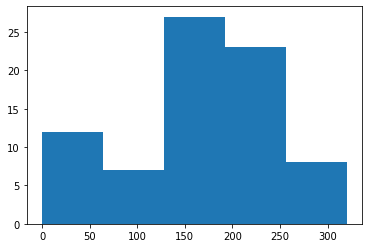

In [74]:
df['sodium'].hist(bins=5)
plt.grid(False)

In [72]:
df['sodium']

name
100% Bran                    130
100% Natural Bran             15
All-Bran                     260
All-Bran with Extra Fiber    140
Almond Delight               200
                            ... 
Triples                      250
Trix                         140
Wheat Chex                   230
Wheaties                     200
Wheaties Honey Gold          200
Name: sodium, Length: 77, dtype: int64

In [75]:
df['sodium_bins'] = pd.cut(df['sodium'], bins=5, labels=[0,1,2,3,4])

In [76]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_encode,shelf_str,sodium_mg,mfr_re,sodium_bins
name,,,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,FDA_25,3,1.0,0.33,68.402973,0,lower,130000,No,2
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,FDA_0,3,1.0,1.00,33.983679,0,lower,15000,No,0
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,FDA_25,3,1.0,0.33,59.425505,0,lower,260000,yes,4
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,FDA_25,3,1.0,0.50,93.704912,0,lower,140000,yes,2
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,FDA_25,3,1.0,0.75,34.384843,0,lower,200000,No,3


### Beberapa Fungsi Pandas yg digunakan untuk ML
- .map() untuk Label Encoding
- .get_dummies() untuk One Hot Encoding
- .cut() untuk Binning

In [80]:
df['potass'].unique()

array([280.  , 135.  , 320.  , 330.  ,  98.67,  70.  ,  30.  , 100.  ,
       125.  , 190.  ,  35.  , 105.  ,  45.  ,  55.  ,  25.  ,  20.  ,
        65.  , 160.  , 120.  ,  80.  , 200.  ,  40.  ,  85.  ,  90.  ,
        60.  ,  95.  , 170.  , 130.  , 260.  ,  15.  ,  50.  , 110.  ,
       240.  , 140.  , 230.  , 115.  ])

In [81]:
bin_potass = [0, 100, 200, 330]

In [82]:
label = ['low', 'medium', 'high']

In [83]:
df['potass_bin'] = pd.cut(df['potass'], bins=bin_potass, labels = label)

In [84]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_encode,shelf_str,sodium_mg,mfr_re,sodium_bins,potass_bin
name,,,,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,FDA_25,3,1.0,0.33,68.402973,0,lower,130000,No,2,high
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,FDA_0,3,1.0,1.00,33.983679,0,lower,15000,No,0,medium
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,FDA_25,3,1.0,0.33,59.425505,0,lower,260000,yes,4,high
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,FDA_25,3,1.0,0.50,93.704912,0,lower,140000,yes,2,high
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,FDA_25,3,1.0,0.75,34.384843,0,lower,200000,No,3,low


In [85]:
pd.crosstab(index=df.mfr, columns=df.potass_bin)

potass_bin,low,medium,high
mfr,,,
A,1,0,0
G,14,7,1
K,15,5,3
N,3,2,1
P,6,2,1
Q,5,3,0
R,4,4,0


In [86]:
df['rating'].unique()

array([68.402973, 33.983679, 59.425505, 93.704912, 34.384843, 29.509541,
       33.174094, 37.038562, 49.120253, 53.313813, 18.042851, 50.764999,
       19.823573, 40.400208, 22.736446, 41.445019, 45.863324, 35.782791,
       22.396513, 40.448772, 64.533816, 46.895644, 36.176196, 44.330856,
       32.207582, 31.435973, 58.345141, 40.917047, 41.015492, 28.025765,
       35.252444, 23.804043, 52.076897, 53.371007, 45.811716, 21.871292,
       31.072217, 28.742414, 36.523683, 36.471512, 39.241114, 45.328074,
       26.734515, 54.850917, 37.136863, 34.139765, 30.313351, 40.105965,
       29.924285, 40.69232 , 59.642837, 30.450843, 37.840594, 41.50354 ,
       60.756112, 63.005645, 49.511874, 50.828392, 39.259197, 39.7034  ,
       55.333142, 41.998933, 40.560159, 68.235885, 74.472949, 72.801787,
       31.230054, 53.131324, 59.363993, 38.839746, 28.592785, 46.658844,
       39.106174, 27.753301, 49.787445, 51.592193, 36.187559])

In [87]:
bin_rating = [0, 50, 75, df['rating'].max()]

In [88]:
labels = ['C', 'B', 'A']

In [89]:
df['target'] = pd.cut(df['rating'], bins=bin_rating, labels=labels)

In [90]:
df.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,type_encode,shelf_str,sodium_mg,mfr_re,sodium_bins,potass_bin,target
name,,,,,,,,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.00,FDA_25,3,1.0,0.33,68.402973,0,lower,130000,No,2,high,B
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.00,FDA_0,3,1.0,1.00,33.983679,0,lower,15000,No,0,medium,C
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.00,FDA_25,3,1.0,0.33,59.425505,0,lower,260000,yes,4,high,B
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.00,FDA_25,3,1.0,0.50,93.704912,0,lower,140000,yes,2,high,A
Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.67,FDA_25,3,1.0,0.75,34.384843,0,lower,200000,No,3,low,C
